In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
pd.set_option('display.max_columns', None)
%matplotlib inline
from sklearn.preprocessing import scale

In [2]:
X_train = pd.read_csv('../../data/Xall.csv',sep = '|',lineterminator='\n')
y_all = pd.read_csv('../../data/yall.csv',sep = '|')

In [3]:
trail_reports = pd.read_csv('../../data/WTA_all_merged.csv',sep = '|',lineterminator='\n')

In [ ]:
trail_reports

In [5]:
scale(X_train)

array([[-1.11149121, -0.77575169, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ],
       [-1.11149121, -0.77575169, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ],
       [-1.11149121, -0.77575169, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ],
       ..., 
       [ 1.30916971,  0.56480579, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ],
       [ 1.30916971,  0.56480579, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ],
       [ 1.30916971,  0.56480579, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ]])

In [6]:
empty_weather = ['EMSD','EMSN','SNOW','TSUN','WDFG','WSFG','DSND','DSNW','DT00']       


In [7]:
X_train.astype(bool).sum(axis=0)

date_sin                                                                     164939
date_cos                                                                     164939
Coast                                                                          5683
Dogs not allowed                                                              23846
Established campsites                                                         48107
Fall foilage                                                                      0
Good for kids                                                                 64575
Lakes                                                                         66263
Mountain views                                                               121648
Old growth                                                                    60664
Ridges/passes                                                                 46972
Rivers                                                                      

In [8]:
df = pd.concat([X_train,y_all], axis=1)

In [9]:
df = df.drop(empty_weather,axis=1)

In [ ]:
df['Trail'] = df_names['Trail']

In [10]:
df['last_year'] = trail_reports['last_year']

In [11]:
test = df[df['last_year'] >= 2016]
train = df[df['last_year'] < 2016]

In [ ]:
test

In [12]:
test_X = test.drop(['condition|snow','condition|trail','condition|bugs','condition|road','last_year'], axis=1)
train_X= train.drop(['condition|snow','condition|trail','condition|bugs','condition|road','last_year'], axis=1) 

In [13]:
test_y = test['condition|bugs']
train_y = train['condition|bugs']

In [ ]:
test_y = test['condition|bugs']
train_y = train['condition|bugs']

Try dropping all columns under .01 feature importance

In [ ]:
test_X = test_X.drop(drops,axis=1)

In [ ]:
train_X = train_X.drop(drops,axis=1)

In [ ]:
train_X = train_X.drop(['lat','long'],axis=1)
test_X = test_X.drop(['lat','long'],axis=1)

In [ ]:
test.shape,train.shape

In [ ]:
train_y.shape,train_X.shape

In [14]:
X_train = train_X
y_train = train_y
X_test = test_X
y_test = test_y

In [ ]:
y_train.shape, X_train.shape

In [ ]:
y_test.shape, X_test.shape

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=10)
rf_model.fit(X_train, y_train)

In [ ]:
rf25_model = RandomForestClassifier(n_estimators=500, max_depth=25)
rf25_model.fit(X_train, y_train)

In [ ]:
rf50_model = RandomForestClassifier(n_estimators=500, max_depth=50)
rf50_model.fit(X_train, y_train)

In [ ]:
rf20_model = RandomForestClassifier(n_estimators=500, max_depth=20)
rf20_model.fit(X_train, y_train)

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
plot_roc(rf20_model,X_test, y_test,'pink')

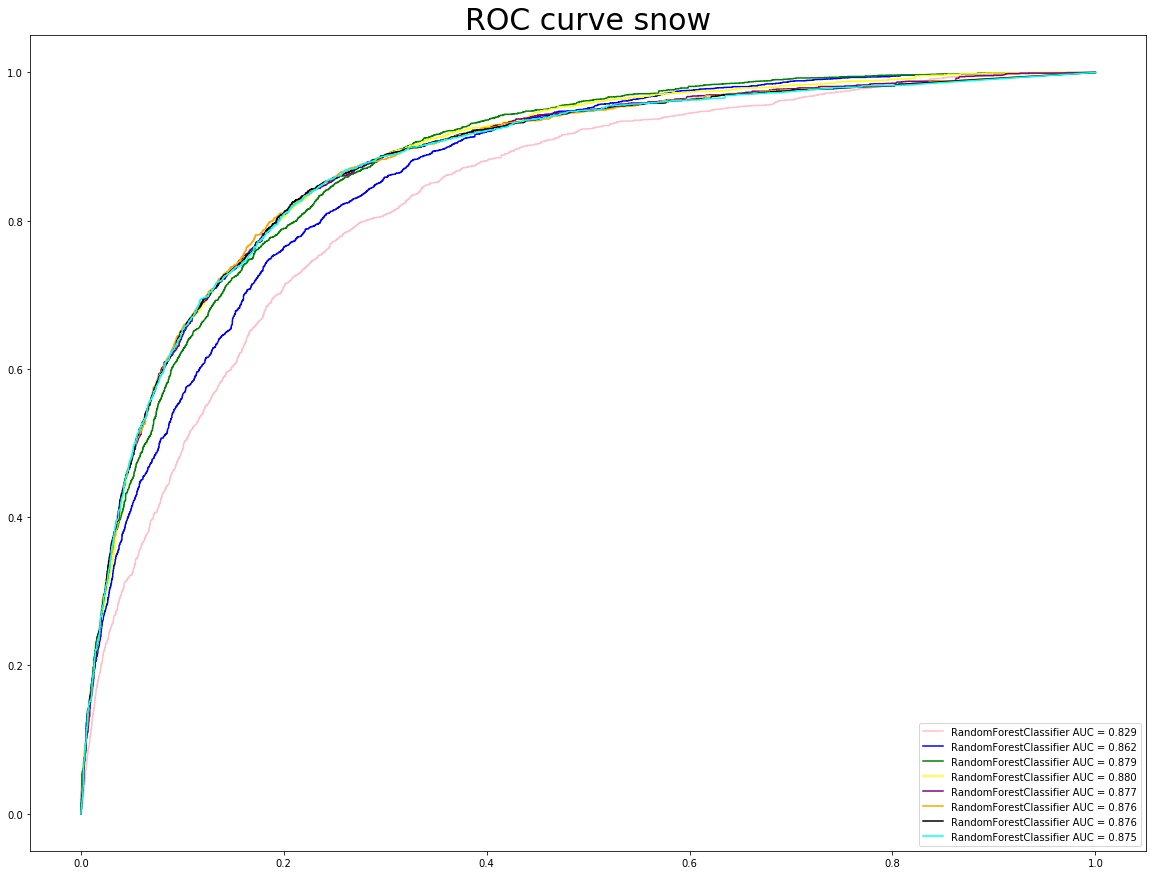

In [26]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve snow')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
    
y_test = test['condition|snow']
y_train = train['condition|snow']    
colors = ['pink','blue','green','yellow','purple','orange','black','aqua']
depths = [5,10,15,20,25,30,35,40]
names = ['one','two','three','four','five','siz','seven','eight']
for depth,color,name in zip(depths,colors,names):
        name = RandomForestClassifier(n_estimators=500, max_depth=depth)
        name.fit(X_train, y_train)
        plot_roc(name,X_test, y_test,color)

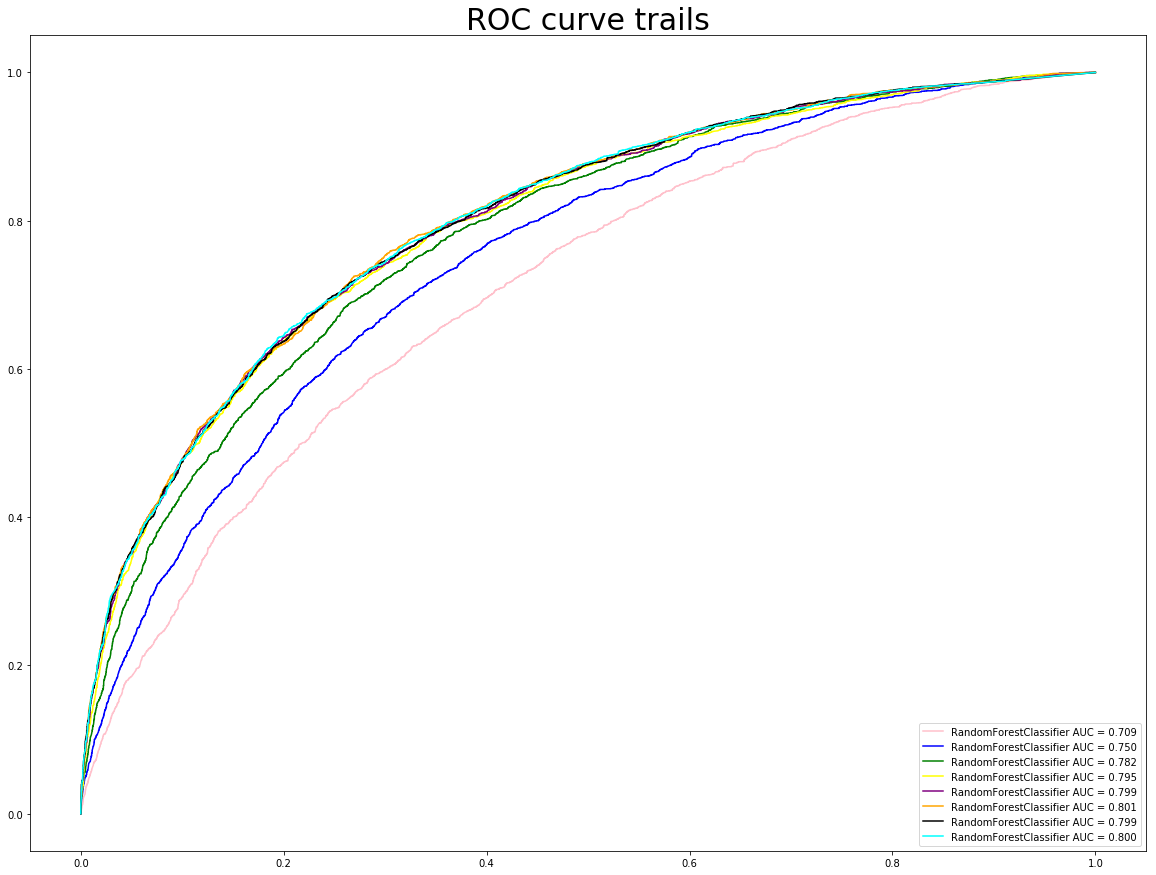

In [28]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve trails')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
    
y_test = test['condition|trail']
y_train = train['condition|trail']    
colors = ['pink','blue','green','yellow','purple','orange','black','aqua']
depths = [5,10,15,20,25,30,35,40]
names = ['one','two','three','four','five','siz','seven','eight']
for depth,color,name in zip(depths,colors,names):
        name = RandomForestClassifier(n_estimators=500, max_depth=depth)
        name.fit(X_train, y_train)
        plot_roc(name,X_test, y_test,color)

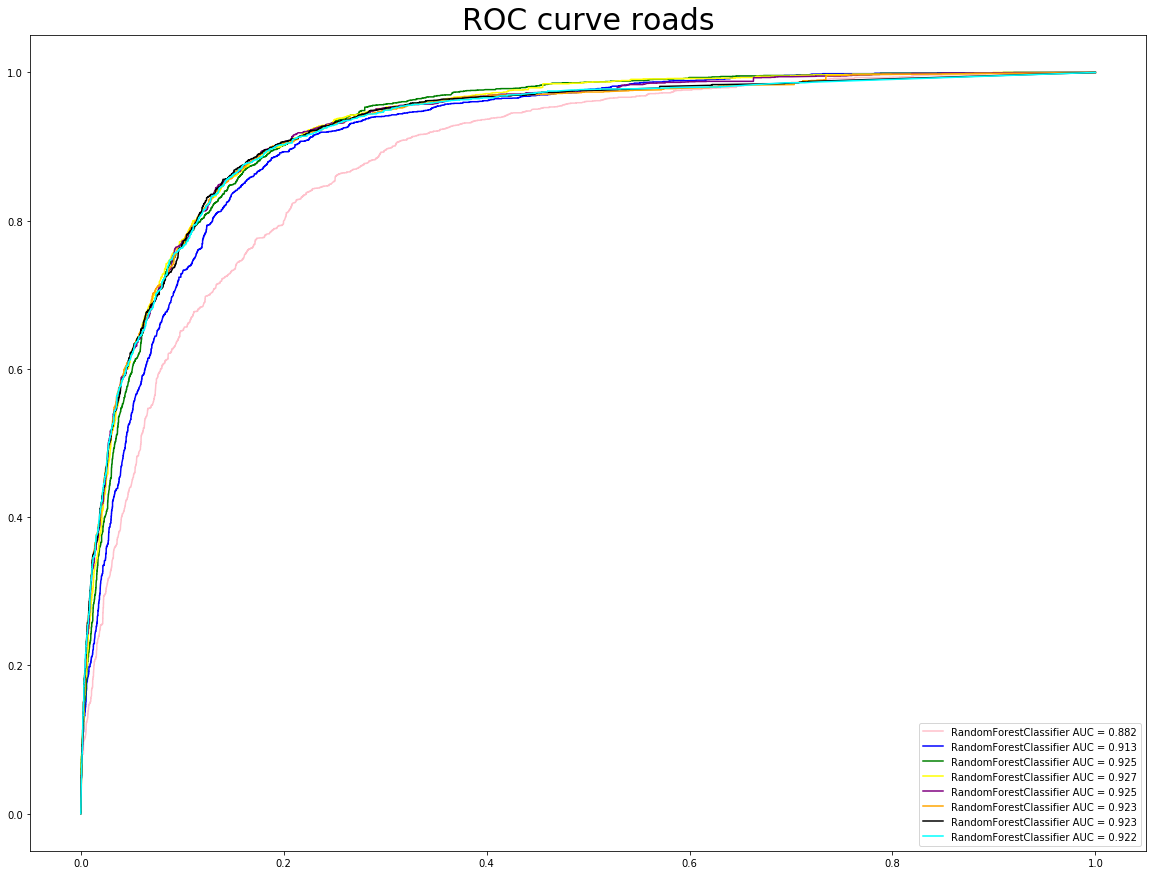

In [29]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve roads')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
    
y_test = test['condition|road']
y_train = train['condition|road']    
colors = ['pink','blue','green','yellow','purple','orange','black','aqua']
depths = [5,10,15,20,25,30,35,40]
names = ['one','two','three','four','five','siz','seven','eight']
for depth,color,name in zip(depths,colors,names):
        name = RandomForestClassifier(n_estimators=500, max_depth=depth)
        name.fit(X_train, y_train)
        plot_roc(name,X_test, y_test,color)

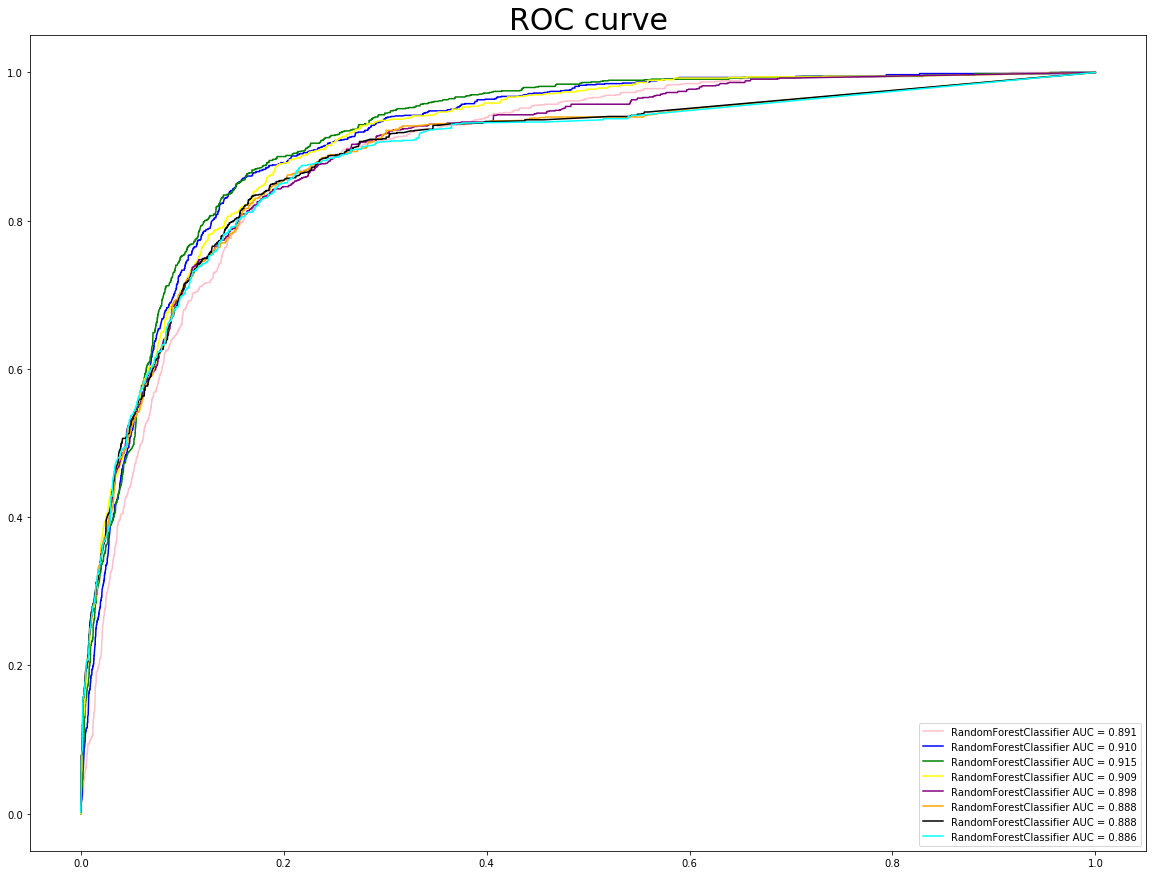

In [20]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve bugs')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
    
colors = ['pink','blue','green','yellow','purple','orange','black','aqua']
depths = [5,10,15,20,25,30,35,40]
names = ['one','two','three','four','five','siz','seven','eight']
for depth,color,name in zip(depths,colors,names):
        name = RandomForestClassifier(n_estimators=500, max_depth=depth)
        name.fit(X_train, y_train)
        plot_roc(name,X_test, y_test,color)

In [19]:
def plot_roc(model, x_columns, y_true,color):

    y_pred = model.predict_proba(x_columns)

    fpr, tpr, threshold = roc_curve(y_true, y_pred[:,1])
    area_under_curve = auc(fpr, tpr)

    # method I: plt
    model_name = str(type(model)).split(".")[-1].strip(">\'")
    ax.plot(fpr, tpr, 'k', label = f'{model_name} AUC = %0.3f' % area_under_curve, color = color)
    ax.legend(loc = 'lower right')

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

ab_model = AdaBoostClassifier(n_estimators=100)
ab_model.fit(X_train, y_train)

kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)

models = [rf_model, gb_model, lr_model, dt_model, ab_model, kn_model]
colors = ['pink','blue','green','yellow','purple','orange']
for model,color in zip(models,colors):
    plot_roc(model, X_test, y_test,color)

ax.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [22]:

conditions = ['condition|snow','condition|trail','condition|bugs','condition|road']
for condition in conditions:
    test_y = test[condition]
    train_y = train[condition]
    model = RandomForestClassifier(n_estimators=500,max_depth = 5)
    model.fit(X_train, y_train)
    y_pred = rf_model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(test_y, y_pred[:,1])
    area_under_curve = auc(fpr, tpr)
    print(model,area_under_curve)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.418002665794
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.586158745974
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_n

In [ ]:
forest_probs = rf_model.predict_proba(X_test)[:,1]
log_probs = lr_model.predict_proba(X_test)[:,1]

In [ ]:
df_names = pd.read_csv('data/new_olympics_merged.csv', sep = '|',lineterminator='\n')

In [ ]:
df_probs = pd.DataFrame({'actual': y_test, 'prob of True forest': forest_probs, 'prob of True log': log_probs,'Date': test['Date'], 'Trail': test['Trail']})

In [ ]:
df_probs

In [ ]:
df_X_test = pd.read_csv('data/X_test_testit.csv', sep = '|')

In [ ]:
df_X_test

In [ ]:
log_probs.shape

In [ ]:
X_test.shape

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='ash.hudd', api_key='VNZP7zrrJqe5xLozigE7')

In [ ]:
p1 = go.Scatter(x=X_train.as_matrix().ravel(), y=y_train, 
                mode='markers',
                marker=dict(color='black'),
                showlegend=False
               )
X_test_rnd = np.linspace(-5, 10, 62)

def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test_rnd * lr_model.coef_[0] + lr_model.intercept_).ravel()

p2 = go.Scatter(x=X_test_rnd, y=loss, 
                mode='lines',
                line=dict(color='red', width=3),
                name='Logistic Regression Model')

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

p3 = go.Scatter(x=X_test_rnd, y=ols.coef_ * X_test_rnd + ols.intercept_, 
                mode='lines',
                line=dict(color='blue', width=1),
                name='Linear Regression Model')
p4 = go.Scatter(x=[-4, 10], y=2*[.5],
                mode='lines',
                line=dict(color='gray', width=1),
                showlegend=False
               )

layout = go.Layout(xaxis=dict(title='x', range=[-4, 10],
                              zeroline=False),
                   yaxis=dict(title='y', range=[-0.25, 1.25],
                              zeroline=False))

fig = go.Figure(data=[p1, p2, p4], layout=layout)

In [ ]:
py.iplot(fig)

In [ ]:
list(zip(X_test.columns,lr_model.coef_[0]))

In [30]:
        rf_20 = RandomForestClassifier(n_estimators=500, max_depth=20)
        rf_20.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
feature_values = {}
for i in range(len(lr_model.coef_[0])):
   feature_values[X_test.columns[i]] = lr_model.coef_[0][i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

In [31]:
feature_values = {}
for i in range(len(rf_20.feature_importances_)):
   feature_values[X_test.columns[i]] = rf_20.feature_importances_[i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

[('neighbors_average condition|road', 0.21372543867579075),
 ('neighbors_average condition|snow', 0.05188403461955033),
 ('neighbors_average condition|trail', 0.049327629068709557),
 ('date_sin', 0.03997818224560732),
 ('date_cos', 0.036361056549947424),
 ('highest_point', 0.030465241709626334),
 ('lat', 0.029700547219829006),
 ('long', 0.028563787667680054),
 ('station_distance', 0.02845417911939294),
 ('distance_from_median', 0.027849641525058807),
 ('numReports', 0.025390108086577694),
 ('neighbors_average condition|bugs', 0.025301980916942055),
 ('stars', 0.023949449705051019),
 ('elevation_gain', 0.022812336586075281),
 ('total_distance', 0.022372519619956198),
 ('number_votes', 0.021922221774086256),
 ('ELEVATION', 0.01504190689222782),
 ('CDSD', 0.012142332520242478),
 ('PRCP', 0.011325083304293628),
 ('CLDD', 0.011144681093666864),
 (' NW - Carbon River/Mowich', 0.011123044698761487),
 ('LATITUDE', 0.010791594423554148),
 ('EMXP', 0.0092144924308177768),
 ('Summits', 0.00886166

In [32]:
lowest_features_bugs = [('Rivers', 0.0049667441125999853),
 ('Wildflowers/Meadows', 0.0049004907577035652),
 ('Lakes', 0.0048714728426947464),
 ('EMXT', 0.0046389425468811151),
 ('Established campsites', 0.0046132044486158711),
 ('Dogs not allowed', 0.0044661653962373765),
 ('None', 0.0041750261383014008),
 ('Waterfalls', 0.0039593710379161214),
 ('Mountain views', 0.0038081232868397664),
 ('DX90', 0.0037219499673489783),
 ('FZF3', 0.0035984865713942654),
 ('FZF6', 0.0035256481557646431),
 ('FZF4', 0.0034702965685546607),
 ('FZF8', 0.0032972135126095349),
 ('FZF5', 0.0030765396998364276),
 (' Snoqualmie Pass', 0.0030446327106135158),
 ('FZF0', 0.0029151339191130442),
 ('Discover Pass', 0.0028633874284187412),
 ('FZF1', 0.0028293446538354256),
 ('National Park Pass', 0.002593917312039644),
 (' Salmon La Sac/Teanaway', 0.002413568471641678),
 (' White Pass/Cowlitz River Valley', 0.0022522223810057928),
 (' Mountain Loop Highway', 0.0018668329588694269),
 (' North Bend Area', 0.001554416426973451),
 (' Hood Canal', 0.0014593108837236564),
 (' Chinook Pass - Hwy 410', 0.0013901413173651081),
 (' NE - Sunrise/White River', 0.0013314606759089831),
 ('NaN', 0.0013051993276463468),
 (' Dark Divide', 0.0011584565391495776),
 (' North Cascades Highway - Hwy 20', 0.00094380688327002076),
 (' Mount St. Helens', 0.00081841502589404967),
 (' Mount Adams Area', 0.00079337548598818353),
 (' Stevens Pass - West', 0.00078938325137893357),
 ('Sno-Parks Permit', 0.0007241151317038181),
 (' Mount Baker Area', 0.0007225399725017366),
 ('Coast', 0.0006687759907443373),
 (' Leavenworth Area', 0.00066399933930189384),
 (' SW - Longmire/Paradise', 0.00064958943937349983),
 (' Lewis River Region', 0.00061214035738681996),
 (' Northern Coast', 0.00046829092804869898),
 ('WDF5', 0.00046336139711246625),
 (' Yakima', 0.00045454216020864751),
 (' Stevens Pass - East', 0.00045236309931301263),
 ('WSF2', 0.00042083557006926202),
 ('WDF2', 0.0004150786422293161),
 ('AWND', 0.00041077128314619203),
 ('WSF5', 0.00040240926880827843),
 (' Goat Rocks', 0.00038722415881339557),
 (" SE - Cayuse Pass/Steven's Canyon", 0.00037571086942997942),
 (' Palouse and Blue Mountains', 0.00035445882237056893),
 (' Seattle-Tacoma Area', 0.00033504359433653738),
 (' Pasayten', 0.00028098885648011613),
 (' Columbia River Gorge - WA', 0.00026789561834642038),
 (' Wenatchee', 0.00025548550940647242),
 ('Wilderness permit. Self-issue at trailhead (no fee)',
  0.00024992527166820672),
 (' Methow/Sawtooth', 0.00022773141049853239),
 (' Blewett Pass', 0.00018519613634809925),
 (' Bellingham Area', 0.00018437592494418125),
 (' Olympia', 0.00016154448516774581),
 (' Pacific Coast', 0.00015969129031465518),
 (" Spokane Area/Coeur d'Alene", 0.00014224688645212192),
 (' Entiat Mountains/Lake Chelan', 0.00011083976550117102),
 (' Tiger Mountain', 9.5020408699989279e-05),
 (' Columbia River Gorge - OR', 8.7597142568299378e-05),
 (' Okanogan Highlands/Kettle River Range', 6.1076051265832599e-05),
 ('None, Northwest Forest Pass', 5.3788398675065109e-05),
 (' Selkirk Range', 4.4373122435378212e-05),
 (' San Juan Islands', 3.7582424646146419e-05),
 (' Cougar Mountain', 3.25727243888131e-05),
 (' Tri-Cities', 3.1829250923524841e-05),
 ('National Monument Fee', 2.9141152169984683e-05),
 (' Kitsap Peninsula', 2.5698638075647e-05),
 (' Grand Coulee', 2.4859175659599432e-05),
 ('Discover Pass, Sno-Parks Permit', 1.448335136855825e-05),
 (' Whidbey Island', 1.3428178734167716e-05),
 ('Refuge Entrance Pass', 1.1545551678150464e-05),
 (' Potholes Region', 1.0915290680107242e-05),
 (' Squak Mountain', 1.0071758381592115e-05),
 (' Long Beach Area', 9.250270239633869e-06),
 ('Oregon State Parks Day-Use', 1.9196111309628403e-06),
 (' Vancouver Area', 1.4823204799680111e-06),
 ('National Monument Fee, Sno-Parks Permit', 8.7796712857593516e-07),
 (' Orcas Island', 7.0139951177141556e-07),
 (' Cle Elum Area', 2.2767276992972029e-07),
 ('Fall foilage', 0.0),
 ('Backcountry camping permit. Register in person at ranger station (no fee)',
  0.0),
 ('Northwest Forest Pass, Sno-Parks Permit', 0.0),
 ('PSUN', 0.0),
 ('WDMV', 0.0)]


In [ ]:
conditions = ['condition|snow','condition|trail','condition|bugs','condition|road']
for condition in conditions:
    y_train = train[condition]
    rf_20 = RandomForestClassifier(n_estimators=500, max_depth=20)
    rf_20.fit(X_train, y_train)
    feature_values = {}
    for i in range(len(rf_20.feature_importances_)):
       feature_values[X_test.columns[i]] = rf_20.feature_importances_[i]

    top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
    print(condition)
    print(top_features)

Input final x and y and try making predictions on x_test data from the split

In [ ]:
X_train

In [ ]:
dates = X_train['Date'].apply(lambda x: pd.to_datetime(x))

In [ ]:
dates_ordered = dates.apply(lambda x: x.month*30 + x.day *(2*math.pi))

In [ ]:
dates_sin = dates_ordered.apply(lambda x: math.sin(x))

In [ ]:
dates_cos = dates_ordered.apply(lambda x: math.cos(x))

In [ ]:
def dates_in_circle(dates):
    dates_ordered = dates.apply(lambda x: x.month*30 + x.day *(2*math.pi))
    dates_sin = dates_ordered.apply(lambda x: math.sin(x))
    dates_cos = dates_ordered.apply(lambda x: math.cos(x))
    return dates_sin, dates_cos

In [ ]:
X_train['sin'], X_train['cos'] = dates_in_circle(dates)